In [2]:
import numpy as np
from scipy.integrate import odeint
%matplotlib inline
import matplotlib.pyplot as plt

## Polymer Cross-linkg reaction
 
 HPAM react with chromium ion as below:
 \begin{equation}
 a[Cr]+b[Py]\to c[Cr-Py]
 \end{equation}
 
Which is an irreversible reaction and the reaction rates are given by:

 \begin{equation}
   {{c}_{H}}=-{{k}_{f}}\cdot {{{c}_{Cr}}^{1.22}}\cdot {{{c}_{Py}}^{0.53}}\cdot {{{c}_{H}}^{-0.9}}
 \end{equation}
  \begin{equation}
  {{R}_{Py}}=-{{k}_{f}}\cdot {{{c}_{Cr}}^{1.22}}\cdot {{{c}_{Py}}^{0.53}}\cdot {{{c}_{H}}^{-0.9}}
   \end{equation}
   \begin{equation}
  {{R}_{Cr-Py}}={{k}_{f}}\cdot {{{c}_{Cr}}^{1.22}}\cdot {{{c}_{Py}}^{0.53}}\cdot {{{c}_{H}}^{-0.9}}
 \end{equation}

Where Hydrogen ion (H+) concentration is calculated from measured PH value using (G. Paul, 2006):
 \begin{equation}
{{c}_{H}}={{10}^{-pH}} 
\end{equation}

### Input Parameters
Temperature 20 ℃:${{k}_{f}}=1.13\times {{10}^{-3}}\text{  }{{h}^{-1}}{{(mol/L)}^{0.15}}$<br />
Temperature 35 ℃:${{k}_{f}}=3.16\times {{10}^{-3}}\text{  }{{h}^{-1}}{{(mol/L)}^{0.15}}$<br />
Constant pH=4.9<br />
Initial Concentration: ${{c}_{Cr}}=1\text{ , }{{c}_{Py}}=60$

In [82]:
kf_20=1.13e-3
kf_35=3.16e-3
pH=4.9
cCr_0=1
cPy_0=3
cCrPy_0=0

In [83]:
def Reaction_rate(C,t,k,pH):
    cCr=C[0]
    cPy=C[1]
    cCrPy=C[2]
    cH=10**(-pH)
    
    dCr_dt=-k*(cCr**1.22)*(cPy**0.53)*(cH**-0.9)
    dPy_dt=-k*(cCr**1.22)*(cPy**0.53)*(cH**-0.9)
    dCrPy_dt=k*(cCr**1.22)*(cPy**0.53)*(cH**-0.9)
    return [dCr_dt,dPy_dt,dCrPy_dt]

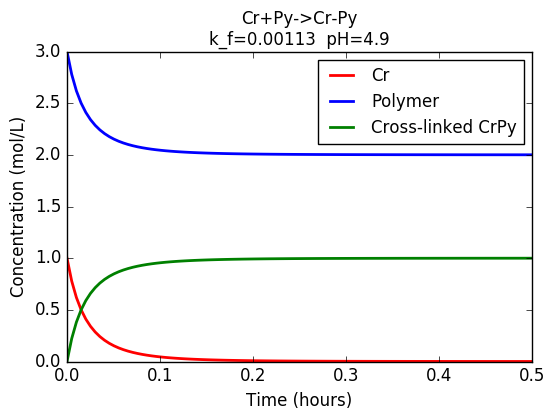

In [84]:
t=np.linspace(0,0.5,100)
C0=[cCr_0,cPy_0,cCrPy_0]
C=odeint(Reaction_rate,C0,t,args=(kf_20, pH))

plt.plot(t,C[:,0],'r-',linewidth=2)
plt.plot(t,C[:,1],'b-',linewidth=2)
plt.plot(t,C[:,2],'g-',linewidth=2)

plt.title('Cr+Py->Cr-Py\nk_f=%s  pH=%s'%(kf_20,pH))
plt.xlabel('Time (hours)',fontsize=12)
plt.ylabel('Concentration (mol/L)',fontsize=12)
plt.legend(['Cr','Polymer','Cross-linked CrPy'],loc='best')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.savefig('Cr-Po.png', dpi=300)